# **Data Science for Decision Support**


**Executor:** Raniyaharini Rajendran

---
INDIVIDUAL DATA VARIANT:

| Task1, Q3 | Task 3 Q2a | Task 3 Q2b    | Task 3 Q2c    | Task 3 Q3bc |Task 4 Q2|
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| RadioButton        | MultipleSelect       | Dropbox         | Page 3 –
Hyperparameters
Page 2 - forecasts         | MSE      |







# Problem: **Regression**  

# **`Task 1 “Data Analysis” `**

1)	Read the data from your individual variant into Python notebook

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,svm
from sklearn.ensemble import RandomForestRegressor
import xgboost 
from catboost import CatBoostRegressor
import lightgbm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import time
import random
from scipy.stats import uniform, randint
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
#add more cell if needed to each code cell
bike_df = pd.read_csv('Bike Sharing_day.csv')

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


2) Copy all necessary pre-processing steps from assignment 1.2. Scale your whole dataset.  Scale your whole dataset. with Standard Scaler. 

In [6]:
#Write your code here 
#Renaming the columns for better understanding
bike_df.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)
bike_df.head()

,id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
'''#Type casting the datetime 

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

#Typecasting numerical attributes to category
bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')'''



"#Type casting the datetime \n\nbike_df['datetime']=pd.to_datetime(bike_df.datetime)\n\n#Typecasting numerical attributes to category\nbike_df['season']=bike_df.season.astype('category')\nbike_df['year']=bike_df.year.astype('category')\nbike_df['month']=bike_df.month.astype('category')\nbike_df['holiday']=bike_df.holiday.astype('category')\nbike_df['weekday']=bike_df.weekday.astype('category')\nbike_df['workingday']=bike_df.workingday.astype('category')\nbike_df['weather_condition']=bike_df.weather_condition.astype('category')"

In [7]:
#Checking for NAN values
bike_df.isnull().sum()

id                   0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [8]:
#No categorical data
#Variables to remove before modelling: ['id','datetime','casual','registered']
bike_df = bike_df.drop(columns = ['id','datetime','casual','registered'])

In [9]:
bike_df.corr()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weather_condition,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


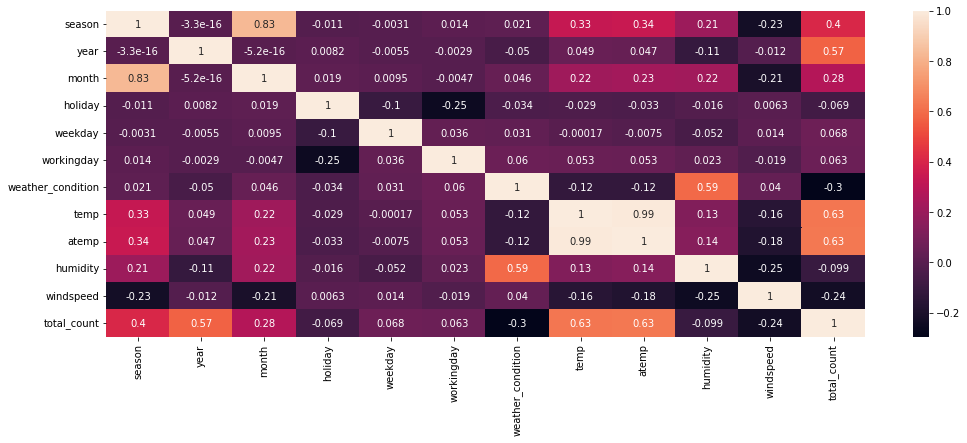

In [ ]:
#Heatmap
plt.figure(figsize=(17,6))
sns.heatmap(bike_df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d9d444d0>,
      dtype=object)

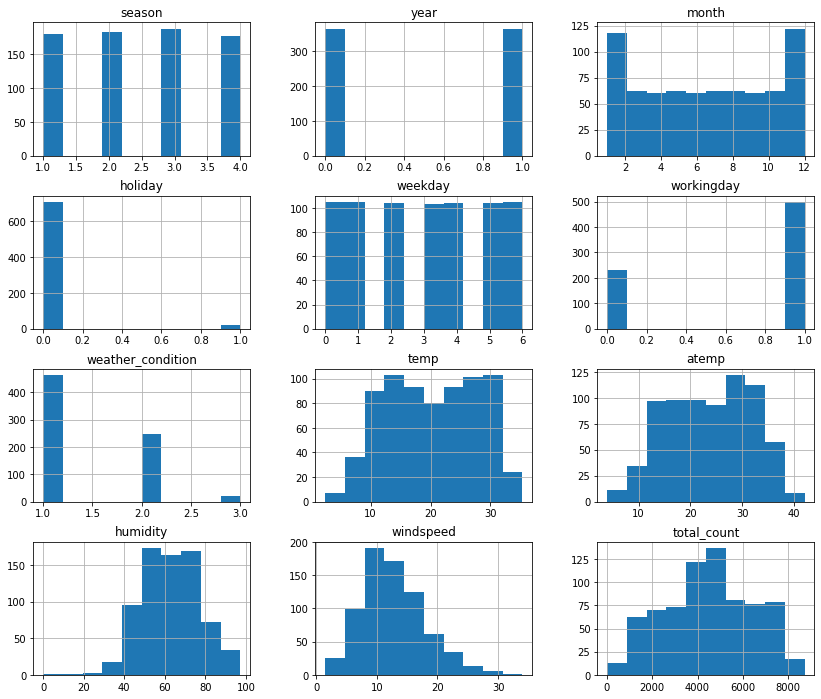

In [ ]:
#Building 2D dependencies between each pair of variables
bike_df.hist(figsize = (14,12))

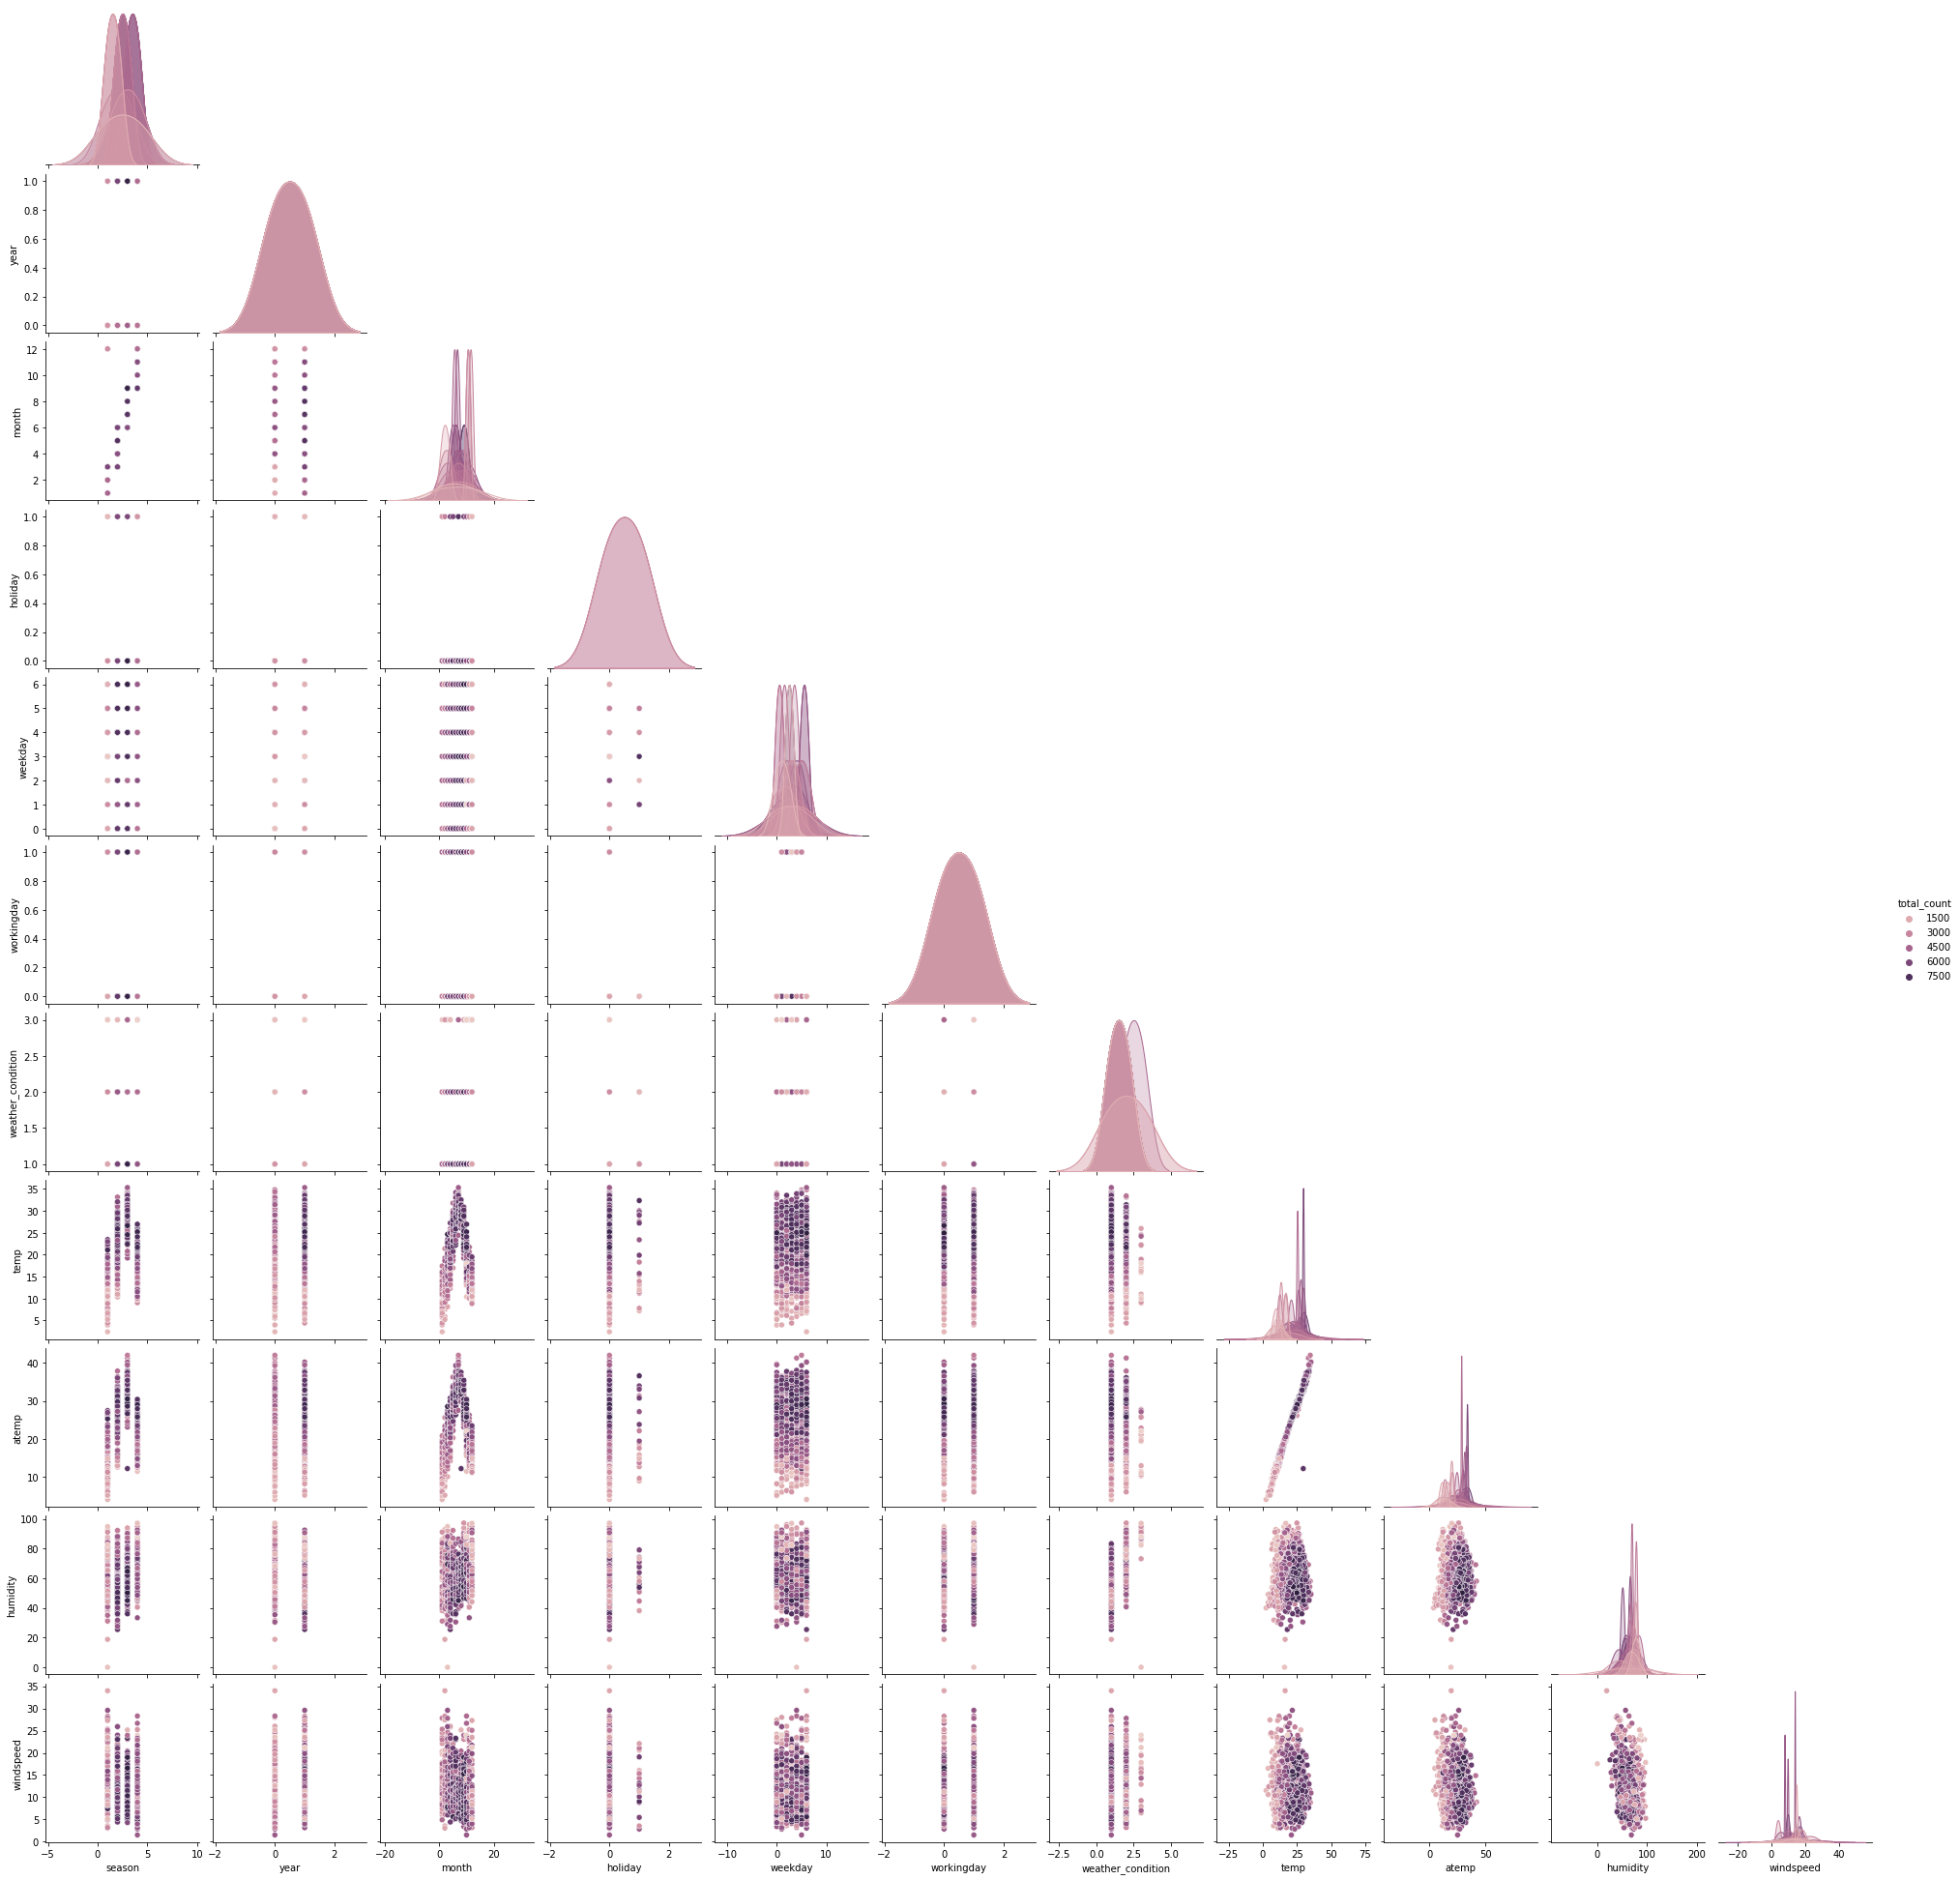

In [ ]:
sns.pairplot(bike_df,hue='total_count',corner=True)

*Comment the results of the previous program*

3) Divide your dataset into 2 parts: training set and test set **(take the propostion from individual variant)**. Output the dimension of the resulting datasets.


In [15]:
#Write your code here 
X = bike_df.drop(["total_count"], axis =1)
y = bike_df["total_count"]


In [16]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=42)

In [17]:
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
X_train.shape

(657, 11)

In [ ]:
X_test.shape

(73, 11)

In [12]:
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X,y,test_size = 0.20, random_state=42)

In [ ]:
X_train1.shape

(584, 11)

In [ ]:
X_test1.shape

(146, 11)

In [13]:
X_train2, X_test2 , y_train2, y_test2 = train_test_split(X,y,test_size = 0.15, random_state=42)

In [ ]:
X_train2.shape

(620, 11)

In [ ]:
X_test2.shape

(110, 11)

4) **Preliminary analysis:** For each model: train with training set and output the regression score (R2) of the model using training set. Now test your model with a testset and output the regression score (R2). Compare R2 inside one model for training and testing sets. Calculate other metrics MSE, RMSE, MAE, mentioned in the corresponding lecture. 

**Random Forest regression**

Random Forest Regressor
Accuracy 0.9839513095195653
R-squared score : 0.882283511769017
MAE: 456.07575342465753
MSE: 368332.6989931508
RMSE: 606.9041925980993


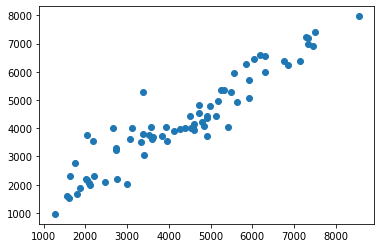

In [18]:
#Write your code for Random forest regression here 
classifier1 = RandomForestRegressor()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print("Random Forest Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Regressor has the best accuracy of 98%

**XGBoost regression**

[11:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost Regressor
Accuracy 0.951816389185834
[11:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:45:08] WARNING: /workspace/src/objective/regression_obj.cu:15

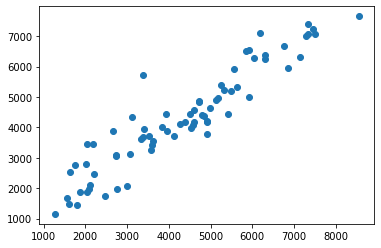

In [19]:
#Write your code for XGBoost regression here 
classifier2 = xgboost.XGBRegressor()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("XG Boost Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier2.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier2, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Accuracy of XGBoost Regressor is comparitively lesser than that of Random Forest Regressor with about 95%

**Cat Boost regression**

Streaming output truncated to the last 5000 lines.
8:	learn: 1539.4709554	total: 39.2ms	remaining: 4.31s
9:	learn: 1503.8907659	total: 44.4ms	remaining: 4.39s
10:	learn: 1469.8928280	total: 52.3ms	remaining: 4.7s
11:	learn: 1436.3586242	total: 67.4ms	remaining: 5.55s
12:	learn: 1402.9289740	total: 74.8ms	remaining: 5.68s
13:	learn: 1371.7918228	total: 79.7ms	remaining: 5.61s
14:	learn: 1340.4725148	total: 85.1ms	remaining: 5.58s
15:	learn: 1313.6684065	total: 88.6ms	remaining: 5.45s
16:	learn: 1287.1069567	total: 90.1ms	remaining: 5.21s
17:	learn: 1260.7550808	total: 92.3ms	remaining: 5.04s
18:	learn: 1234.6612493	total: 93.7ms	remaining: 4.84s
19:	learn: 1210.6213007	total: 95ms	remaining: 4.65s
20:	learn: 1187.6017254	total: 96.9ms	remaining: 4.52s
21:	learn: 1164.3320259	total: 101ms	remaining: 4.5s
22:	learn: 1140.2567699	total: 103ms	remaining: 4.37s
23:	learn: 1118.2402247	total: 104ms	remaining: 4.24s
24:	learn: 1096.9289370	total: 106ms	remaining: 4.12s
25:	learn: 1076.6240227	

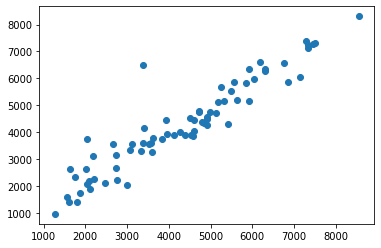

In [20]:
#Write your code for XGBoost regression here 
classifier3 = CatBoostRegressor()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("Cat Boost Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier3, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

We can see that the R2 score computed from Cat Boost regressor is abut an average of 89%

**Light GBM regression**

Light GBM Regressor
Accuracy 0.9903569550273821
R-squared score : 0.8824616332041089
MAE: 468.07265868587444
MSE: 404141.95045643795
RMSE: 635.7215982302614


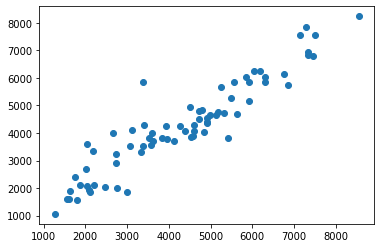

In [21]:
classifier4 = lightgbm.LGBMRegressor()
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

print("Light GBM Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier4, X_train, y_train, cv=5)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

LGBM regressor is predicted to be the best model since it has the best accuracy score of 99%.


Although we know that the efficiency of a model can never be determined with the help of just accuracy for the purpose of comparison and inorder to choose a primary metric I have chosen accuracy as the basis for model comparison. A model with a good accuracy score can never be called as efficient there are various other features which determine the efficiency of the model.

5)	Recalculate the results of Task 1 using MinMaxScaler (use the same random_state as for Standard Scaler by splitting into trainingset and testset) and compare the results based on metric R2. Use the Scaler, which gives the best results for the next Tasks. 

Streaming output truncated to the last 5000 lines.
18:	learn: 1234.6612493	total: 50.4ms	remaining: 2.6s
19:	learn: 1210.6213007	total: 53.1ms	remaining: 2.6s
20:	learn: 1187.6017254	total: 55.1ms	remaining: 2.57s
21:	learn: 1164.3320259	total: 57ms	remaining: 2.53s
22:	learn: 1140.2567699	total: 58.3ms	remaining: 2.48s
23:	learn: 1118.2402247	total: 60.1ms	remaining: 2.44s
24:	learn: 1096.9289370	total: 61.4ms	remaining: 2.4s
25:	learn: 1076.6240227	total: 63.2ms	remaining: 2.37s
26:	learn: 1057.6258274	total: 65.1ms	remaining: 2.35s
27:	learn: 1040.1362282	total: 67.4ms	remaining: 2.34s
28:	learn: 1023.8825714	total: 68.7ms	remaining: 2.3s
29:	learn: 1008.2194621	total: 73.1ms	remaining: 2.36s
30:	learn: 992.7181594	total: 75.6ms	remaining: 2.36s
31:	learn: 977.7881557	total: 77.6ms	remaining: 2.35s
32:	learn: 963.2959521	total: 79.4ms	remaining: 2.33s
33:	learn: 950.1572845	total: 81.1ms	remaining: 2.3s
34:	learn: 937.4748757	total: 82.7ms	remaining: 2.28s
35:	learn: 924.0327789	tot

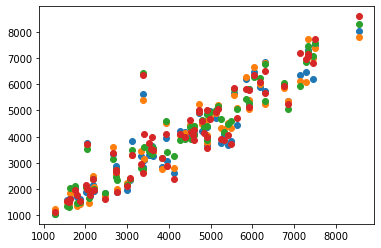

In [22]:
#Write your code here 
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Random Forest Regressor',
    'XG Boost Regressor',
    'CatBoost Regressor',
    'LGBM Regressor'
]

models = [
    RandomForestRegressor(),
    xgboost.XGBRegressor(),
    CatBoostRegressor(),
    lightgbm.LGBMRegressor()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)
    plt.scatter(y_test,y_pred)
    classifier1=model.score(X_train,y_train)
    print("Accuracy", classifier1)

    #R2 score
    r2_scores = cross_val_score(model, X_train, y_train, cv=10)
    print('R-squared scores :',np.average(r2_scores))

    #MAE,MSE,RMSE
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        

for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

For the purpose of having an optimal code, I used looping to run all the models simultaneously. Since CatBoost  Regressor evaluates and displays its learning outcomes the accuracies of the other models where truncated by the compiler. However when I checked them individually I found MinMax Scalar to be less efficient than that of StandardScalar. There were few cases where the accuracies tend to move towards negation which made it practically impossible to determine the model performance. 

# **`Task 2 “Cross validation and grid search of hyperparameter values”  `**

1)	Use the function GridSearchCV() to find the best parameters for each ML method. Use 5 fold cross validation. Use the scaling selected at the previous stage.

**Random Forest regression**

In [ ]:
#Write your code here. 
classifier1 = RandomForestRegressor()

params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#GridSearch CV
search = GridSearchCV(classifier1,params, cv=3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Best Score:  0.867185906008336
Best Estimator:  RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)
Best Params:  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


Initially when I performed parameter tuning the computational time was more. I tried using RandomSearchCv and I was able to obtain the desired result. But however since it was explicitly mentioned that I had to use GridSearch CV I tried to reduce the number of iterations. I was able to derive the output only when the split was 3.

**XGBoost regression**

In [ ]:
#Write your code here. 
classifier2 = xgboost.XGBRegressor()

params = {
    "colsample_bytree": [0.7, 0.3],
    "gamma": [0, 0.5],
    "learning_rate": [0.03, 0.3], # default 0.1 
    "max_depth": [2, 6], # default 3
    "n_estimators": [100, 150], # default 100
    "subsample": [0.6, 0.4]
}

#GridSearch CV
search = GridSearchCV(classifier2,params)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Although computational time was less and I was able to derive the output. XGBoost regressor used the default parameter 'reg:squarederror' instead of 'reg:lineaqr' due to which the warning arose. Once the default was changed the warning was eliminated

**Cat Boost regression**

In [ ]:
#Write your code here. 
classifier3 = CatBoostRegressor()

params = {
    'depth' : [4,5,6,7,8,9, 10],
    'learning_rate' : [0.01,0.02,0.03,0.04],
    'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
}

#GridSearch CV
search = GridSearchCV(classifier3,params, cv = 3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
3:	learn: 1765.1121209	total: 39.4ms	remaining: 454ms
4:	learn: 1723.8883393	total: 51.2ms	remaining: 461ms
5:	learn: 1688.7785331	total: 63.3ms	remaining: 465ms
6:	learn: 1646.5917232	total: 65ms	remaining: 400ms
7:	learn: 1609.6652100	total: 76.5ms	remaining: 402ms
8:	learn: 1568.7056441	total: 88.4ms	remaining: 403ms
9:	learn: 1532.3107542	total: 90.9ms	remaining: 363ms
10:	learn: 1500.4080808	total: 103ms	remaining: 364ms
11:	learn: 1472.4016152	total: 115ms	remaining: 365ms
12:	learn: 1439.6956535	total: 119ms	remaining: 339ms
13:	learn: 1405.0835914	total: 125ms	remaining: 321ms
14:	learn: 1372.9181732	total: 145ms	remaining: 338ms
15:	learn: 1343.7828774	total: 157ms	remaining: 333ms
16:	learn: 1317.1391840	total: 169ms	remaining: 328ms
17:	learn: 1291.5843242	total: 181ms	remaining: 321ms
18:	learn: 1269.7052577	total: 192ms	remaining: 314ms
19:	learn: 1247.6539827	total: 204ms	remaining: 306ms
20:	learn: 1226.7

Computational time of CatBoost Regressor was extremely high. Therefore just like RandomForestRegresssor i had to reduce the number of iterations in order to perform the parameter tuning

**Light GBM regression**

In [ ]:
#Write your code here. 
classifier4 = lightgbm.LGBMRegressor()

params = {
    'num_leaves': [6, 50], 
    'min_child_samples': [100, 500], 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

#GridSearch CV
search = GridSearchCV(classifier4,params, cv = 3)

search.fit(X_train, y_train)

print("Best Score: " , search.best_score_)
print("Best Estimator: " , search.best_estimator_)
print("Best Params: " , search.best_params_)

Best Score:  0.8365221132414579
Best Estimator:  LGBMRegressor(min_child_samples=100, min_child_weight=1e-05, num_leaves=6,
              reg_alpha=7, reg_lambda=0.1)
Best Params:  {'min_child_samples': 100, 'min_child_weight': 1e-05, 'num_leaves': 6, 'reg_alpha': 7, 'reg_lambda': 0.1}


LGBM Regressor provided the simplest hyper parameter tuning and provided the efficient parameters for use.

In [ ]:
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Random Forest Regressor',
    'XG Boost Regressor',
    'CatBoost Regressor',
    'LGBM Regressor'
]

models = [
    RandomForestRegressor(),
    xgboost.XGBRegressor(),
    CatBoostRegressor(),
    lightgbm.LGBMRegressor()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)

    #R2 score
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    print('R-squared scores :',np.average(cross_val))


for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
11:	learn: 1452.2240336	total: 26.3ms	remaining: 2.17s
12:	learn: 1420.3702343	total: 28.1ms	remaining: 2.14s
13:	learn: 1390.9586011	total: 29.9ms	remaining: 2.11s
14:	learn: 1361.8234509	total: 31ms	remaining: 2.03s
15:	learn: 1334.9349272	total: 32ms	remaining: 1.97s
16:	learn: 1307.6968964	total: 33.1ms	remaining: 1.91s
17:	learn: 1284.1365191	total: 34.3ms	remaining: 1.87s
18:	learn: 1260.0354707	total: 35.3ms	remaining: 1.82s
19:	learn: 1236.2159473	total: 37ms	remaining: 1.81s
20:	learn: 1211.7367383	total: 38.9ms	remaining: 1.81s
21:	learn: 1189.1247188	total: 39.9ms	remaining: 1.77s
22:	learn: 1165.5686804	total: 41ms	remaining: 1.74s
23:	learn: 1144.2499744	total: 42ms	remaining: 1.71s
24:	learn: 1123.9004184	total: 43.1ms	remaining: 1.68s
25:	learn: 1104.2173715	total: 44.1ms	remaining: 1.65s
26:	learn: 1085.2504303	total: 45.1ms	remaining: 1.63s
27:	learn: 1067.6195763	total: 46.9ms	remaining: 1.63s
28:	lear

2)	Evaluate the built models and found best hyper-parameters with the test set data. Compare the results of different models, comment the result and draw the conclusion about the best forecasting model.

**Random Forest regression**

Random Forest Regressor
Accuracy 0.9389022308575333
R-squared score : 0.8729749163525968
MAE: 444.937872123873
MSE: 370296.1576344799
RMSE: 608.5196444113204


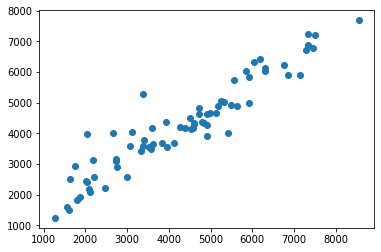

In [ ]:
#With hyper-parameters 
classifier1 = RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print("Random Forest Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier1.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier1, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

**XGBoost regression**

[22:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost Regressor
Accuracy 0.9671022954935296
[22:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:19] WARNING: /workspace/src/objective/regression_obj.cu:1

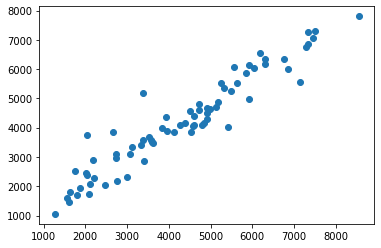

In [ ]:
#With hyper-parameters 
classifier2 = xgboost.XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=6,
             n_estimators=150, subsample=0.4)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("XG Boost Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier2.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier2, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

**Cat Boost regression**

0:	learn: 1894.5468957	total: 1.27ms	remaining: 126ms
1:	learn: 1839.6764712	total: 4.75ms	remaining: 233ms
2:	learn: 1789.2924575	total: 7.26ms	remaining: 235ms
3:	learn: 1739.9079480	total: 10.7ms	remaining: 257ms
4:	learn: 1693.1166776	total: 12.3ms	remaining: 233ms
5:	learn: 1648.0701007	total: 14.6ms	remaining: 229ms
6:	learn: 1604.6085916	total: 17.1ms	remaining: 227ms
7:	learn: 1563.2582171	total: 19.5ms	remaining: 224ms
8:	learn: 1527.9298306	total: 21.8ms	remaining: 221ms
9:	learn: 1487.4105672	total: 24.2ms	remaining: 217ms
10:	learn: 1450.1569554	total: 26.5ms	remaining: 214ms
11:	learn: 1415.7692307	total: 28.9ms	remaining: 212ms
12:	learn: 1383.6265626	total: 31.3ms	remaining: 209ms
13:	learn: 1352.0691610	total: 33.7ms	remaining: 207ms
14:	learn: 1320.3460803	total: 36ms	remaining: 204ms
15:	learn: 1291.7715944	total: 38.3ms	remaining: 201ms
16:	learn: 1264.4732163	total: 40.7ms	remaining: 199ms
17:	learn: 1235.6472528	total: 49.9ms	remaining: 227ms
18:	learn: 1208.275689

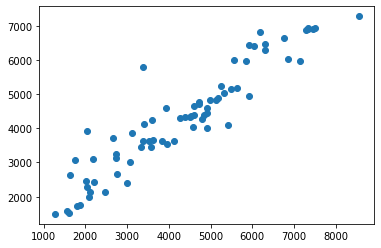

In [ ]:
#With hyper-parameters
classifier3 = CatBoostRegressor(depth=5, iterations=100, learning_rate= 0.04)
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

print("Cat Boost Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier3, X_train, y_train, cv=10)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

**Light GBM regression**

Light GBM Regressor
Accuracy 0.9903569550273821
R-squared score : 0.8391398695712183
MAE: 454.01877897397765
MSE: 368498.7070600059
RMSE: 607.0409434791083


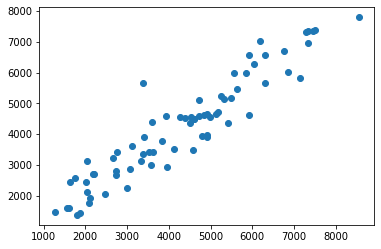

In [ ]:
#With hyper-parameters
classifier4 = lightgbm.LGBMRegressor(min_child_samples=100, min_child_weight=1e-05, num_leaves=6,
              reg_alpha=7, reg_lambda=0.1)
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

print("Light GBM Regressor")
plt.scatter(y_test,y_pred)
classifier=classifier3.score(X_train,y_train)
print("Accuracy",classifier)
#R2 score
r2_scores = cross_val_score(classifier4, X_train, y_train, cv=5)
print('R-squared score :',np.average(r2_scores))

#MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

After Hyper parameter tuning, as expected we can see that the models have performed much better. Accuracies have increased drastically. LGBM Regressor proved to be the best model

# **`Task 3 “Regression dashboard” `**

In [41]:
#Write your code here
from IPython.display import clear_output

dd3 =widgets.RadioButtons(options = ['Linear regression','DT','KNN','SVM','Random Forest Regressor','XGBoost Regressor','Cat Boost Regressor','LGBM Regressor'],description = 'Model',value = None)
ui1 = widgets.HBox([dd3])

R2 = widgets.Checkbox(value=False, description='R2')
MSE = widgets.Checkbox(value=False, description='MSE')
RMSE = widgets.Checkbox(value=False, description='RMSE')
MAE = widgets.Checkbox(value=False, description='MAE')

ui2 = widgets.HBox([R2,MSE,RMSE,MAE])

Standard_Scalar = widgets.Output()
MinMax_Scalar = widgets.Output()
dd4 =widgets.Dropdown(options = ['Standard_Scalar', 'MinMax_Scalar'],description = 'Scale',value = None)
ui3 = widgets.HBox([dd4])

#Declaring Tabs
tab = widgets.Tab()
pre_processing_box = widgets.Output()
performance_metrics_box = widgets.Output()
prediction_box = widgets.Output()
accuracy_plot_box = widgets.Output()

tab.titles = ['Pre_processing','Performance_metrics','Prediction']
tab.children = [pre_processing_box, performance_metrics_box, prediction_box]

for i,title in enumerate(['Pre_processing','Performance metrics','Prediction']):
  tab.set_title(i,title)

display(widgets.HTML('<br><b><centre><font size="8"> Mithun Srinivasan</font></centre></b>'))
display(ui1)
display(ui2)
display(ui3)
display(tab)
#Choosing StandardScalar or MinMax Scalar
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X,y,test_size = 0.10, random_state=42)

#Declaring functions for individual models
def model_LR(X_train1, X_test1 , y_train1, y_test1):
  classifier = LinearRegression()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_DT(X_train1, X_test1 , y_train1, y_test1):
  classifier = DecisionTreeRegressor()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_KNN(X_train1, X_test1 , y_train1, y_test1):
  classifier = KNeighborsRegressor()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_SVM(X_train1, X_test1 , y_train1, y_test1):
  classifier = SVR()
  classifier = classifier.fit(X_train1,y_train)
  y_pred = classifier.predict(X_test1)
  return classifier

def model_RF(X_train1, X_test1 , y_train1, y_test1):
  classifier = RandomForestRegressor()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_XGB(X_train1, X_test1 , y_train1, y_test1):
  classifier = xgboost.XGBRegressor()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_CatBoost(X_train1, X_test1 , y_train1, y_test1):
  classifier = CatBoostRegressor()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier
    
def model_LGBM(X_train1, X_test1 , y_train1, y_test1):
  classifier = lightgbm.LGBMRegressor()
  classifier = classifier.fit(X_train1,y_train1)
  y_pred = classifier.predict(X_test1)
  return classifier

#Declaring Tab 1 - Pre-processing
'''def CM(model):
  g = bike_df.hist(figsize = (14,12))
  a = X_train1.shape
  b = X_test1.shape
  cm = metrics.confusion_matrix(y_test1, y_pred)
  return g,a,b,cm'''

#Declaring tab 2 - Performance metrics
def performance(model):
  
    r2 = cross_val_score(model, X_train, y_train, cv=10)
    r2 = np.average(r2_scores)

    #MAE,MSE,RMSE
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return MSE
    
  
#Declaring different models
def bandwidth_widget(model):
#Choosing the actual model
  if(model == 'Linear regression'):
    classifier = model_LR(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'DT'):
    classifier = model_DT(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'KNN'):
    classifier = model_KNN(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'SVM'):
    classifier = model_SVM(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'Random Forest Regressor'):
    classifier = model_RF(X_train1, X_test1 , y_train1, y_test1)
    
  elif(model == 'XGB Regressor'):
    classifier = model_XGB(X_train1, X_test1 , y_train1, y_test1)
      
  elif(model == 'Cat Boost Regressor'):
    classifier = model_CatBoost(X_train1, X_test1 , y_train1, y_test1)
    
  else:
    classifier = model_LGBM(X_train1, X_test1 , y_train1, y_test1)
  

  #df = CM(classifier)
  pm = performance(classifier)
  
  with pre_processing_box:
    clear_output()
    g = bike_df.hist(figsize = (14,12))
    a = X_train1.shape
    b = X_test1.shape
    cm = bike_df.corr()
    display(g)
    display(a)
    display(b)
    display(cm)

  #Declaring Tab 3 - predictions
  dd=pd.DataFrame()
  dd['True values'] = y_test
  dd['Predictions'] = y_pred
  dd['True'] = (dd['True values'] == dd['Predictions'])
  with prediction_box:
    clear_output()
    display(dd)

  
  with performance_metrics_box:
    clear_output()
    display('MSE',pm)


out1 = widgets.interactive_output(bandwidth_widget,{'model' :dd3})
display(out1)

HTML(value='<br><b><centre><font size="8"> Mithun Srinivasan</font></centre></b>')

Output()

Creation of dashboards from ipywidgets has its own pros and cons. Although with simpler syntax the performance of ipywidgets was troublesome. Since the training and testing data were more I had to restart the kernel everytime to run the code snippet. Barplots disappered sometimes and reappeared later. When I try shifting from one model to another the time to display the results was too high. 

# **`Task 4 “Model Performance evaluation”  `**

1) Use Plotly library to output the results of all 8 models built based on test dataset. 

Model: Linear Regression 



Model: Decision Tree Regressor 



Model: KNN Regressor 



Model: SVR 



Model: Random Forest Regressor 



Model: XG Boost Regressor 


[12:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model: CatBoost Regressor 


Learning rate set to 0.038314
0:	learn: 1898.7271323	total: 3.8ms	remaining: 3.8s
1:	learn: 1847.0725488	total: 5.25ms	remaining: 2.62s
2:	learn: 1800.5452551	total: 6.36ms	remaining: 2.11s
3:	learn: 1753.2798420	total: 8.75ms	remaining: 2.18s
4:	learn: 1706.4796870	total: 10.2ms	remaining: 2.04s
5:	learn: 1660.3299047	total: 11.2ms	remaining: 1.85s
6:	learn: 1620.6991536	total: 12.6ms	remaining: 1.79s
7:	learn: 1582.9566821	total: 14ms	remaining: 1.74s
8:	learn: 1546.6578693	total: 16.2ms	remaining: 1.78s
9:	learn: 1510.4404862	total: 22.2ms	remaining: 2.2s
10:	learn: 1474.9474513	total: 23.6ms	remaining: 2.12s
11:	learn: 1440.9837686	total: 25.1ms	remaining: 2.06s


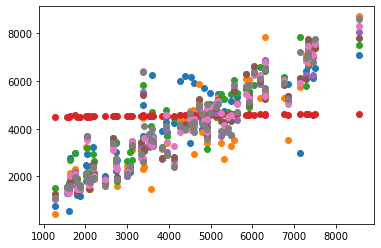

In [36]:
X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Linear Regression',
    'Decision Tree Regressor',
    'KNN Regressor',
    'SVR',
    'Random Forest Regressor',
    'XG Boost Regressor',
    'CatBoost Regressor',
    'LGBM Regressor'
]

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    SVR(),
    RandomForestRegressor(),
    xgboost.XGBRegressor(),
    CatBoostRegressor(),
    lightgbm.LGBMRegressor()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)

    plt.scatter(y_test,y_pred)


for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()

2)	Construct a bar diagram for (**R2/ MSE/RMSE/MAE**) of the obtained models

In [40]:
import plotly.express as px
import numpy

X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)

#Declaring different models
model_name = [
    'Linear Regression',
    'Decision Tree Regressor',
    'KNN Regressor',
    'SVR',
    'Random Forest Regressor',
    'XG Boost Regressor',
    'CatBoost Regressor',
    'LGBM Regressor'
]

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    SVR(),
    RandomForestRegressor(),
    xgboost.XGBRegressor(),
    CatBoostRegressor(),
    lightgbm.LGBMRegressor()
]

#Classification report and ROC
def model_train_report(model,X_train1, X_test1, y_train, y_test):
    model = model.fit(X_train1,y_train)
    y_pred = model.predict(X_test1)

    #R2 score
    r2_scores = cross_val_score(model, X_train, y_train, cv=10)

        #MAE,MSE,RMSE
    MAE=metrics.mean_absolute_error(y_test, y_pred)
    MSE= metrics.mean_squared_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    l= ['r2_scores','MAE','MSE','RMSE']
    p = [r2_scores,MAE,MSE,RMSE]
    fig = px.bar(l,p)
    fig.show()


for name,model in zip(model_name,models):
    print(f'Model: {name} \n\n')
    model_train_report(model,X_train1, X_test1, y_train, y_test)
    print()



Model: Linear Regression 





Model: Decision Tree Regressor 





Model: KNN Regressor 





Model: SVR 





Model: Random Forest Regressor 





Model: XG Boost Regressor 


[13:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

Streaming output truncated to the last 5000 lines.
4:	learn: 1694.6703720	total: 8.14ms	remaining: 1.62s
5:	learn: 1650.8414888	total: 9.4ms	remaining: 1.56s
6:	learn: 1612.2212070	total: 11.1ms	remaining: 1.57s
7:	learn: 1575.5809649	total: 12.7ms	remaining: 1.58s
8:	learn: 1539.4709554	total: 14.4ms	remaining: 1.58s
9:	learn: 1503.8907659	total: 16.1ms	remaining: 1.59s
10:	learn: 1469.8928280	total: 17.7ms	remaining: 1.59s
11:	learn: 1436.3586242	total: 19.4ms	remaining: 1.59s
12:	learn: 1402.9289740	total: 21.3ms	remaining: 1.61s
13:	learn: 1371.7918228	total: 23.2ms	remaining: 1.64s
14:	learn: 1340.4725148	total: 25ms	remaining: 1.64s
15:	learn: 1313.6684065	total: 26.8ms	remaining: 1.65s
16:	learn: 1287.1069567	total: 28.7ms	remaining: 1.66s
17:	learn: 1260.7550808	total: 32.2ms	remaining: 1.75s
18:	learn: 1234.6612493	total: 33.9ms	remaining: 1.75s
19:	learn: 1210.6213007	total: 39ms	remaining: 1.91s
20:	learn: 1187.6017254	total: 40.8ms	remaining: 1.9s
21:	learn: 1164.3320259	to


Model: LGBM Regressor 




Initially when I tried using plotly it did not work well with the compiler and I had to shift to chart-studio. Later I depreciated the plotly version and tried but the results weren't as expected. Trying to plot them using Keras was more complex too. 